In [10]:
from utils import *
from matplotlib import pyplot as plt
import plotly.express as px

plt.style.use('Solarize_Light2')


### Visualisation de quelques bandes spectrales

X shape:  (610, 340, 103)
y shape:  (610, 340)


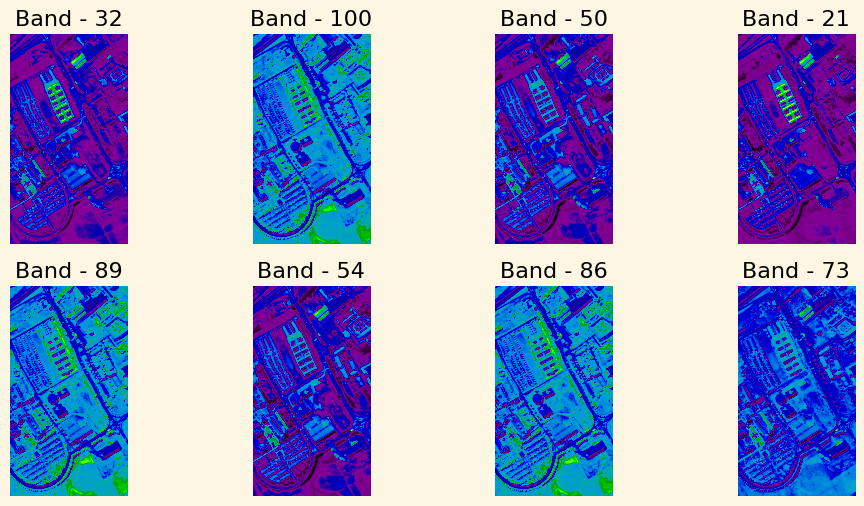

In [15]:
X, y = loadData("PU")
print("X shape: ", X.shape)
print("y shape: ", y.shape)

fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    q = np.random.randint(X.shape[2])  #random
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')
plt.savefig('PU_Bands.png')

### étude des labels (Targets)

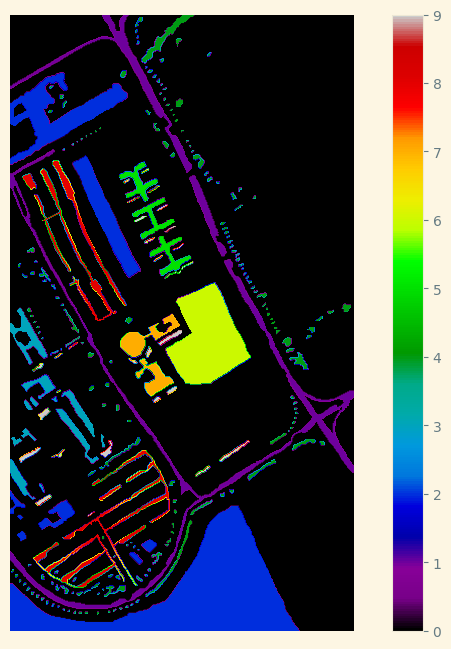

In [8]:
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()

##### Visualisation de la distribution des classes, y compris la classe 0

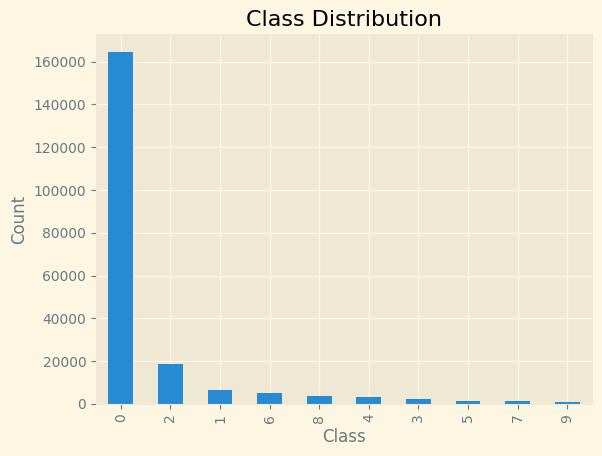

In [9]:
plot_class_distribution(y)

#### Visualisation des classes, 0 non compris

In [11]:
class_counts = pd.Series(y.flatten()).value_counts()
bar_fig = px.bar(x=class_counts.index[1:], y=class_counts[1:], labels=y, color=class_counts.index[1:])
bar_fig.update_layout(
        xaxis=dict(
            title='Class',
            tickmode='array',
            tickvals=class_counts.index[1:].tolist(),
            tickangle=45
        ),
        yaxis=dict(
            title='count',
        ),
        showlegend=False
)
bar_fig.show()


#### Visualisation des CEV, pour savoir le nombre de composants de PCA

X.shape (610, 340, 10)
y.shape (610, 340)
EV [0.58318064 0.94418758 0.98856319 0.99157161 0.99366953 0.99544696
 0.99667817 0.99736012 0.99782334 0.99814674]


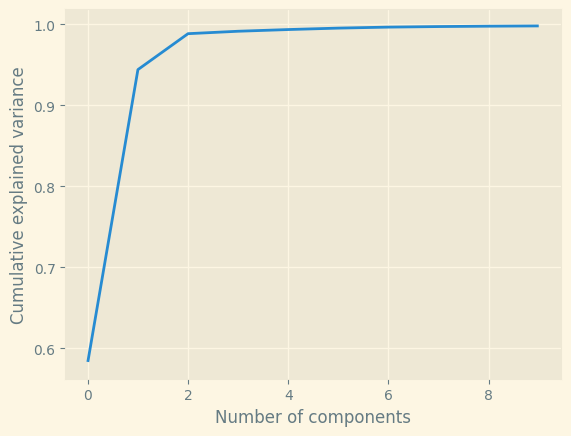

In [17]:
X_pca,pca = applyPCA(X,numComponents=10)
ev=pca.explained_variance_ratio_
print('X.shape',X_pca.shape)
print('y.shape',y.shape)
print('EV',np.cumsum(ev))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()